<a href="https://colab.research.google.com/github/keshav-reddy-27/program/blob/main/2211CS020027_NLP_HOLIDAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
print("hello")

hello


In [8]:
!pip install nltk scikit-learn seaborn
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('amazon.csv')
df.head()

Saving amazon.csv to amazon (1).csv


,Text,label
0,This is the best apps acording to a bunch of ...,1
1,This is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import nltk
nltk.download('punkt')
import nltk
nltk.data.path.append('/usr/share/nltk_data') # Add the resource path
nltk.download('punkt', download_dir='/usr/share/nltk_data')
import nltk
# Add the resource path to NLTK
nltk.data.path.append('/usr/share/nltk_data') # Ensure nltk looks in the correct directo
# Download the punkt resource and punkt_tab resource
nltk.download('punkt', download_dir='/usr/share/nltk_data') # Force download to the spec
nltk.download('punkt_tab', download_dir='/usr/share/nltk_data')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove non-alphanumeric characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    stop_words = set(stopwords.words('english'))  # Load stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Define the lemmatization function
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    tokens = word_tokenize(text)  # Tokenize the text
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens])  # Lemmatize each token

# Apply the cleaning and lemmatization functions
# Apply the cleaning and lemmatization functions
df['cleaned_reviews'] = df['Text'].apply(clean_text) # Use 'Text' as the column name
df['lemmatized_reviews'] = df['cleaned_reviews'].apply(lemmatize_words)
# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['lemmatized_reviews']).toarray()
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)
# Initialize the Logistic Regression model
model = LogisticRegression()
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Predict the sentiment of the test set
y_pred = model.predict(X_test)
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary') # Adjust for multiclass if
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.88475
Precision: 0.8907537381751602
Recall: 0.9659166115155526
F1 Score: 0.9268137799650739


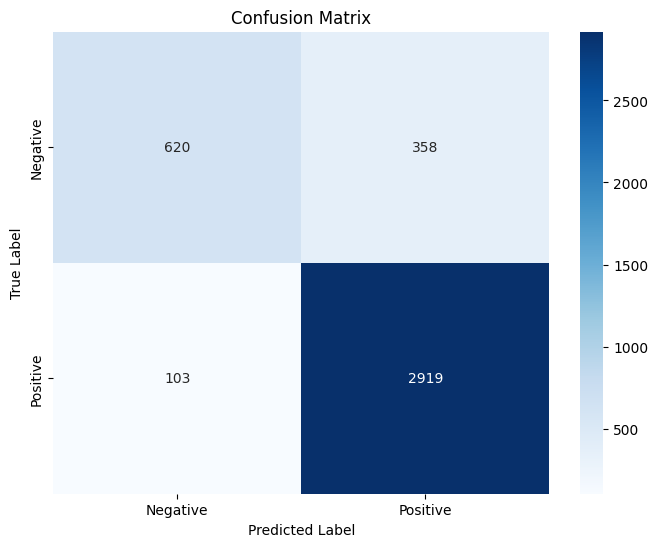

In [13]:
# Generate and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,
            fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.title('Confusion Matrix')
plt.show()

In [14]:
import joblib
# Save the model
joblib.dump(model, 'sentiment_model.pkl')
# Save the vectorizer
joblib.dump(vectorizer, 'vectorizer.pkl')
def predict_sentiment(text):
  cleaned_text = clean_text(text)
  lemmatized_text = lemmatize_words(cleaned_text)
  vectorized_text = vectorizer.transform([lemmatized_text]).toarray()
  return model.predict(vectorized_text)
# Test with a new review
new_review = "This product is amazing! Highly recommend it."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment[0]}")
import joblib
# Save the trained model
joblib.dump(model, 'sentiment_model.pkl')
# Save the TF-IDF vectorizer
joblib.dump(vectorizer, 'vectorizer.pkl')

The sentiment of the review is: 1


['vectorizer.pkl']